# MÁSODIK HÉT

Kovariancia: cov(X,Y) = E(X*Y) - E(X)*E(Y)

(Pearson-féle) Korrelációs együttható: v(X, Y) = cov(X,Y) / (D(X)*D(Y))


-1 <= (X, Y) <= 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Korreláció
### Kérdés: hogyan mérhetjük a kapcsolat erősségét két változó között?

### [Kovariancia](https://hu.wikipedia.org/wiki/Kovariancia)
A kovariancia számszerűsíti két egymástól különböző változó együttmozgását. Vagyis az egyik változó eltérését a saját várható értékétől hogyan követi a másik változó eltérése annak a várható értékétől. Matematikailag:

**Cov(X,Y)=E[(X−E(X))(Y−E(Y)]**

Más formában:

**Cov(X,Y)=E(XY)−E(X)E(Y)**

Tulajdonságok:
1. Ha **X** és **Y** független valószínűségi változók, akkor **Cov(X,Y)=0** (a megfordítás nem igaz).
2. **Cov(X,Y)=Cov(Y,X)**
3. **Cov(X,X)=Var(X)**
4. **Cov(aX+b,Y)=a⋅Cov(X,Y)**


#### Példa:
Generáljunk két független véletlen mintát (x és y). Tekintsük az (x,y) számpárokat.
1. Ábrázoljuk a pontokat a síkon.
2. Számítsuk ki a kovarianciát.

In [27]:
#
mu = 5 # Mű
sigma = 2
x = np.random.normal(mu, sigma, 10000) # 5 várható értékű, 2 szórású, normális eloszlású, 1000 nagyságú minta.
y = np.random.normal(mu, sigma, 10000) # 5 várható értékű, 2 szórású, normális eloszlású, 1000 nagyságú minta.
# Függetlenek egymástól

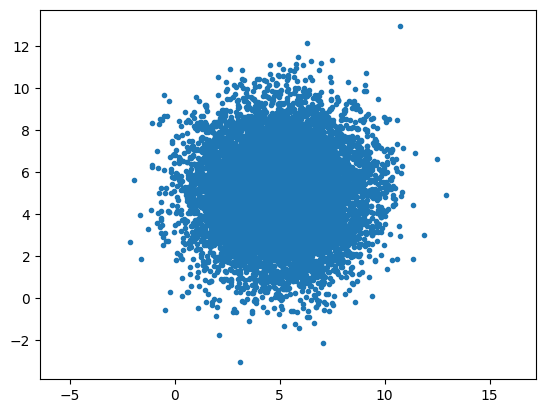

In [28]:
# A pontok a síkon (x,y) koordinátákkal
plt.plot(x,y,'.')
plt.axis('equal')
plt.show()
# A várható érték küróli értékek nagyobb valószínűséggel fordulnak elő

In [29]:
# a kovariancia a képlet alapján
# Cov(X,Y) = E(XY) - E(X)E(Y)

cov_xy = np.mean( x*y ) - np.mean(x)*np.mean(y)
cov_xy
# Egy nulla körüli szám

np.float64(0.06061713141165015)

In [32]:
# Másképp:
np.cov(x,y)[0,1]

np.float64(0.06062319373102327)

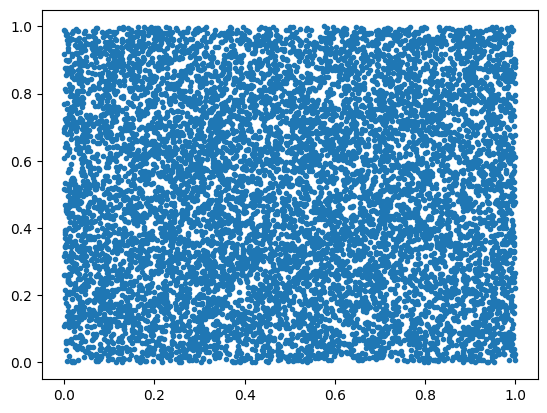

In [53]:
# egyenletes eloszlásból generált minták:
x1 = np.random.uniform(0,1, 10000)
y1 = np.random.uniform(0,1, 10000)
plt.plot(x1,y1,'.')
plt.show()

In [54]:
np.cov(x1,y1)[0,1]

np.float64(-0.00012456461124322115)


#### Példa:
Generáljunk két függő véletlen mintát.
- Ábrázoljuk a pontokat a síkon.
- Számítsuk ki a kovarianciát.

In [66]:
# Végtelen sok lehetőségünk van valamennyire függő minták előállítására. Az egyik lehetőség: 

x = np.random.normal(0, 3, 1000)
noise = np.random.normal(0, 1, 1000) # Itt a középső paraméter (szórás) változtatásával
y = x + noise

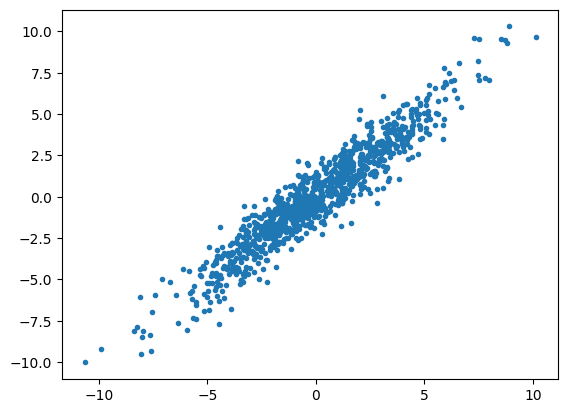

In [67]:
# A pontok a síkon:

plt.plot(x,y,'.')
plt.show()

In [68]:
np.cov(x,y)

array([[8.74559945, 8.65872132],
       [8.65872132, 9.55907632]])

### [Korreláció](https://hu.wikipedia.org/wiki/Korrel%C3%A1ci%C3%B3)

A Pearson-féle korrelációs együttható (vagy röviden korrelációs együttható, Pearson-féle r) két valószínűségi változó kovarianciájának és a szórásaik szorzatának hányadosa:
**r(X,Y)=Cov(X,Y)D(X)D(Y)**

Más, szinén elterjedt jelölések: ***R, ρ.*** A Pearson-féle korrelációs együttható a lineáris kapcsolat erősségét méri.

Tulajdonságok
1. Ha **Y=aX+b** és **a>0**, akkor **r(X,Y)=1**.
2. Ha **Y=aX+b** és **a<0**, akkor **r(X,Y)=−1**.
3. Ha **r(X,Y)=0**, akkor nincs közöttük lineáris kapcsolat.

Dokumentáció: [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)

Vannak még más korrelációs együtthatók is:
- [Spearman's correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
- [Kendall's correlation](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient).

Példa:
- Generáljunk két lineárisan függő véletlen mintát.
- Adjunk hozzá egy kis 'zajt'.
- Számítsuk ki a korrelációs együtthatót.
    - a képlet alapján
    - a [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) függvény segítségével.
- Ábrázoljuk a pontokat.

In [156]:
# Generáljunk két lineárisan függő véletlen mintát.
x = np.random.normal(0,1,100)
y = 2*x + 5

In [157]:
# Adjunk hozzá egy kis 'zajt'.
noise = np.random.normal(0,10,100)
y = y + noise

In [158]:
# a korrelációs együttható a képlet alapján:
r = (np.mean( x*y ) - np.mean(x)*np.mean(y)) / (np.var(x)*np.var(y))**0.5
r

np.float64(0.1170878266529123)

In [159]:
# a korrelációs együttható a scipy.stats.pearsonr függvénnyel: 
stats.pearsonr(x,y)

PearsonRResult(statistic=np.float64(0.11708782665291227), pvalue=np.float64(0.24598652834533535))

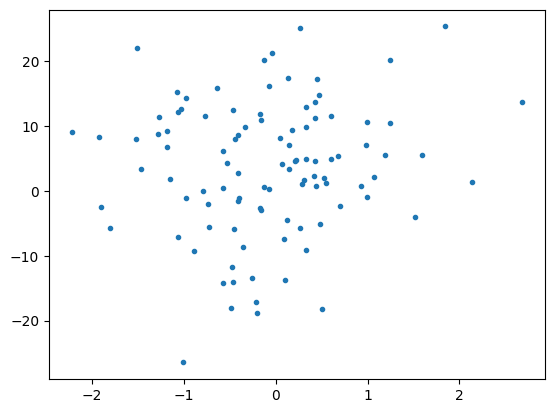

In [160]:
plt.plot(x,y,'.')
plt.show()

#### Példa:
A nulla korreláció nem jelent függetlenséget.

In [161]:
#
x = np.random.normal(0,1,10000)
y = x*x # tehát y egyértelműen függ x-től

r = (np.mean( x*y ) - np.mean(x)*np.mean(y)) / (np.var(x)*np.var(y))**0.5
r

np.float64(0.024837867716618278)

In [162]:
# Használjuk a pearsonr függvényt:
stats.pearsonr(x,y)

PearsonRResult(statistic=np.float64(0.02483786771661825), pvalue=np.float64(0.012996709765085478))

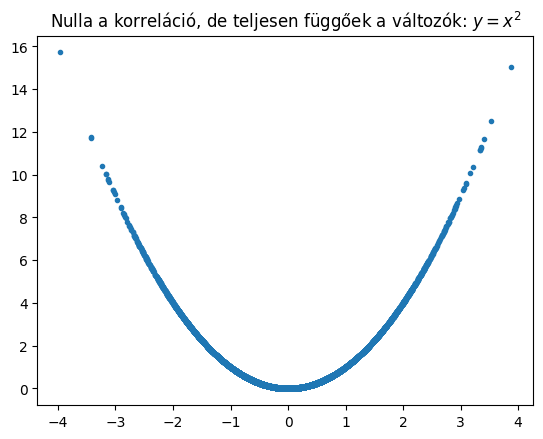

In [163]:
#
plt.plot(x,y,'.')
plt.title('Nulla a korreláció, de teljesen függőek a változók: $y=x^2$')
plt.show()

[Rang korrelációk](https://hu.wikipedia.org/wiki/Rangkorrel%C3%A1ci%C3%B3):

A Pearson-féle korrelációs együtthatóval szemben nem csak lineáris kapcsolatot képes mérni, az összefüggést tetszőleges monoton függvény szerint képes vizsgálni, eloszlásuk vizsgálata nélkül.

Mi a rang? Nagyság szerint növekvő sorba rendezzük az elemeket. Az elem rangja az a szám, ahányadik ebben a sorban.

- [Kendall](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient), **Kendall-féle tau**

Dokumentáció: [kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)

    Alapesetben:
    - ha **xi<xj** és **yi<yj**, akkor konkordáns (ilyen esetek száma: C)
    - ha **xi<xj** és **yi>yj**, akkor diszkordáns (ilyen esetek száma: D)

**τ = (C−D) / (C+D)**

- [Spearman](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient), **Spearman-féle ró**

A Pearson-féle korreláció speciális esete, ahol az adatokat ranggá konvertáljuk, mielőtt kiszámítjuk a rangkorrelációt.

    Dokumentáció: [spearmanr](https://docs.scipy.org/doc/scipy/tutorial/stats/hypothesis_spearmanr.html#hypothesis-spearmanr)